# Introduction
This assignment focusses on finding out the flow of currents in a resistor in a conductor. We also wish to find out the part of the conductor which is likely to get hottest.

## Setup
A wire is soldered to the middle of a copper plate and its voltage is held at 1 Volt. One side of the plate is grounded, while the remaining are floating. The plate is 1 cm by 1 cm in size.

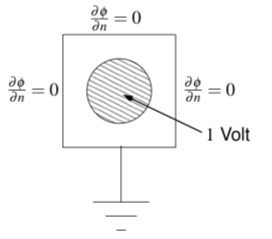

In [1]:
from IPython.display import Image
Image('/Users/siddharthnayak/Desktop/Screen Shot 2018-03-05 at 7.34.50 PM.png')

We have to solve the equation $\nabla^2(\phi)=0$<br/>
i.e.$ \frac{\partial^2 \phi}{\partial x^2}$ + $\frac{\partial^2 \phi}{\partial y^2}=0$<br/>
Solving this numerically we get:<br/>
$\phi_{i,j}= \frac{\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}+\phi_{i,j-1}}{4}$<br/>

So a matrix of potential '$\phi$' is initialized.<br/>
And we have to update the potential using the above equation.
The boundary condition used is that $\frac{\partial{\phi}}{\partial{n}}=0$<br/>
Thus the potential doesn't change in the normal direction at the boundaries.


# Import Libraries

In [2]:
from pylab import *
import mpl_toolkits.mplot3d.axes3d as p3

# Set the parameters.

In [3]:
scale=1 #cm
Nx=25
Ny=25
radius=0.35 # in cm
Niter=1500
phi=np.zeros((Nx,Ny))
iter_arr=np.linspace(0,Niter,Niter)
limit=scale/2

# To obtain the coordinates of the wire on the conductor

In [4]:
x=np.linspace(-limit,limit,Nx)
y=np.linspace(-limit,limit,Nx)
Y,X=meshgrid(y,x) # get the co-ordinates of the grid
ii=where(X**2+Y**2<=radius**2)
phi[ii]=1.0  #update the potential 

# Plot the Contour Plot of the potential

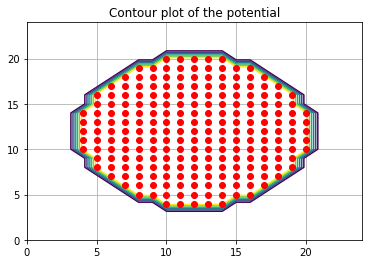

In [5]:
x=arange(0,Nx)   # create x and y axes
y=arange(0,Ny)
plt.contour(phi)
plt.plot(y[ii[0]],x[ii[1]],'ro')
plt.title('Contour plot of the potential')
plt.grid()
plt.show()

# Update the potential matrix along with the error in each iteration

In [6]:
error=np.zeros((Niter,1))
for k in range(Niter):
    oldphi=phi.copy()
    phi[1:-1,1:-1]=0.25*(phi[1:-1,0:-2]+phi[1:-1,2:]+phi[0:-2,1:-1]+phi[2:,1:-1])#update the potential
    phi[1:-1,0]=phi[1:-1,1] #update left column
    phi[1:-1,-1]=phi[1:-1,-2] #update right column
    phi[0,:]=phi[1,:] #update the topmost row
    phi[ii]=1.0
    error[k]=(abs(oldphi-phi)).max()

# Plot the 3D figure of the potential after the updates

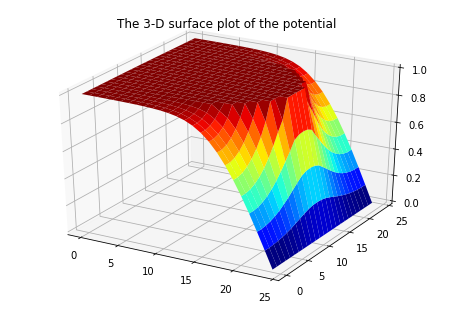

In [7]:
fig1=figure(4)     # open a new figure
ax=p3.Axes3D(fig1) # Axes3D is the means to do a surface plot
x=arange(0,Nx)   # create x and y axes
y=arange(0,Ny)
X,Y=meshgrid(x,y)  # creates arrays out of x and y
title('The 3-D surface plot of the potential')
surf = ax.plot_surface(X, Y, phi.T, rstride=1, cstride=1,cmap='jet')
plt.show()

# Plot of the Contour Diagram of the potential

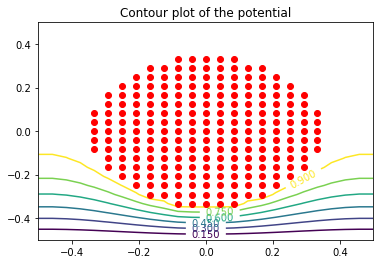

In [8]:
x=np.linspace(limit,-limit,Nx)
y=np.linspace(limit,-limit,Nx)
Y,X=meshgrid(y,x) # get the co-ordinates of the grid
Cs = plt.contour(X,Y,phi.T)
plt.clabel(Cs, fontsize=10)
plt.plot(y[ii[0]],x[ii[1]],'ro')
plt.title('Contour plot of the potential')
plt.show()

# Plot of error vs iterations

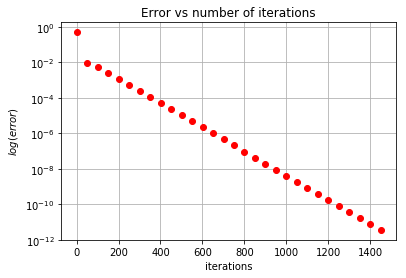

In [9]:
iter_arr=np.linspace(0,Niter,Niter)
semilogy(iter_arr[0:-1:50],error[0:-1:50],'ro',label='error')
title('Error vs number of iterations')
ylabel('$log(error)$')
xlabel('iterations')
grid()
show()


# Error Estimation
The error in this algorithm of updates is of the form $Ae^{bx}$<br/>
$\therefore y=Ae^{bx}$<br/>
$\therefore \log{y}=\log{A}+bx$<br/>
Therefore if we fit this using least squares method we can estimate $log{A}$ and b<br/>
\begin{equation}
\begin{bmatrix}
    1       & x_{1}  \\
    1       & x_{2}  \\
    \vdots  & \vdots \\
    1       & x_{n} 
\end{bmatrix}
.
\begin{bmatrix}
    log{A}\\
    b
\end{bmatrix}
 =
\begin{bmatrix}
    log{y_{1}}\\
    log{y_{2}}\\
    \vdots    \\
    log{y_{n}}\\
\end{bmatrix} 
\end{equation}

In [10]:
A=np.zeros((int(Niter/30),2))
iter_arr1=np.linspace(1,Niter+1,1500)
A[:,0]=1
A[:,1]=(iter_arr1[0:-1:30])
terms=lstsq(A,np.log(error[::30]))[0]#least squares

logA=terms[0]
b=terms[1]
log_error=logA+b*(iter_arr1)
error1=np.exp(logA)*np.exp(b*(iter_arr1))



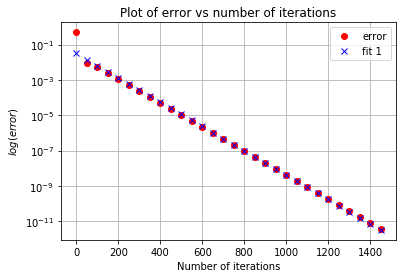

In [11]:

plt.semilogy(iter_arr[0:-1:50],error[0:-1:50],'ro',label='error')
plt.semilogy(iter_arr[0:-1:50],error1[0:-1:50],'bx',label='fit 1')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('$log(error)$')
plt.grid()
plt.title('Plot of error vs number of iterations')
plt.show()

# Extracting the currents from the potential equation
We have $J=\sigma.E$<br/>
$\therefore J_{x}=-\sigma.\frac{\partial{\phi}}{\partial{x}}$<br/>
$\therefore J_{y}=-\sigma.\frac{\partial{\phi}}{\partial{y}}$<br/>
Taking $\sigma=1$ for the sake of just getting the profile of the currents.<br/>
Thus $J_{x,i,j}=\frac{\phi_{i,j-1}-\phi_{i,j+1}}{2}$<br/>
$J_{y,i,j}=\frac{\phi_{i-1,j}-\phi_{i+1,j}}{2}$<br/>



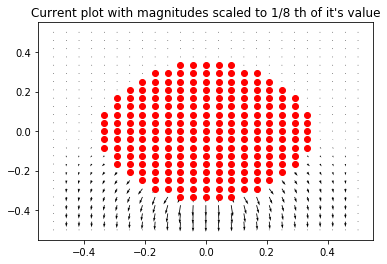

In [12]:
x=np.linspace(-limit,limit,Nx)
y=np.linspace(-limit,limit,Nx)
Y,X=meshgrid(y,x)
Jx=np.zeros((Nx,Ny))
Jy=np.zeros((Nx,Ny))
Jx[1:-1,1:-1]=0.5*(phi[1:-1,0:-2]-phi[1:-1,2:])
Jy[1:-1,1:-1]=0.5*(phi[0:-2,1:-1]-phi[2:,1:-1])

    
plt.quiver(y,x,Jx[::-1,:],-Jy[::-1,:],scale=8)
plt.plot(y[ii[0]],x[ii[1]],'ro')
plt.title("Current plot with magnitudes scaled to 1/8 th of it's value")
plt.show()

Note:
* The currents are perpendicular to the equipotential lines in the graph.<br/>
* The magnitudes of the current are scaled to $\frac{1}{8}$th of their original values for neatness in the graph 


# Heat Map of the conductor
As the current flows in the conductor, it heats up. Thus increasing it's temperature.This phenomenon is called Joule Heating.The heat equation is given by $\kappa \nabla^2{T}=-\frac{1}{\sigma} {|J|^2}$<br/>
We take $\kappa=1$,$\sigma=1$ and $\Delta{x}=1$ for simplicity<br/>
Thus expanding this equation gives us:<br/>
$T_{i,j}= \frac{T_{i+1,j}+T_{i-1,j}+T_{i,j+1}+T_{i,j-1}+|J|^2}{4(\Delta{x})^2}$<br/>
Thus by updating the temperature `Niter` times we get a temperature which converges.<br/>
The boundary condition is that at the boundary $\frac{\partial{T}}{\partial{n}}=0$<br/>

In [13]:
dx=1
k=1    # thermal conductivity of copper 
sigma=1  #electrical conductivity of copper 
Jx_sq=Jx[1:-1,1:-1]**2
Jy_sq=Jy[1:-1,1:-1]**2
J_sq=Jx_sq+Jy_sq
constant_term= (J_sq*(dx**2))/(sigma*k) #source term


In [14]:
# initialize the temperature matrix
T=np.zeros((Nx,Ny))
T[ii]=300
T[-1,:]=300


for k in range(Niter):
    T[1:-1,1:-1]=0.25*((T[1:-1,0:-2]+T[1:-1,2:]+T[0:-2,1:-1]+T[2:,1:-1])+constant_term)
    T[1:-1,0]=T[1:-1,1] #update left column
    T[1:-1,-1]=T[1:-1,-2] #update right column
    T[0,:]=T[1,:] #update the topmost row
    T[ii]=300
    

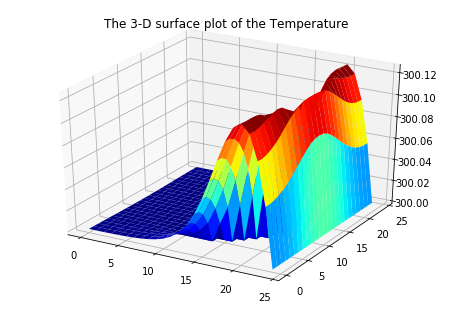

In [15]:
fig1=figure(4)     # open a new figure
ax=p3.Axes3D(fig1) # Axes3D is the means to do a surface plot
x=arange(0,Nx)   # create x and y axes
y=arange(0,Ny)
X,Y=meshgrid(x,y)  # creates arrays out of x and y
title('The 3-D surface plot of the Temperature')
surf = ax.plot_surface(X, Y, T.T, rstride=1, cstride=1,cmap='jet')
plt.show()

# Discussions and Conclusions
1:The potential matrix of the conductor converges to a solution using the update algorithm with an error of $Ae^{bx}$ where x is the number of iterations.<br/>
2:The currents flow mostly on the lower part of the condutor where the potential drop is maximum as seen in the graphs.<br/>
3:The currents are perpendicular to the equipotential lines in the graph.<br/>
4:The conductor gets the hottest at the lower part of the conductor where most of the current is flowing.